In [21]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [22]:
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# **Loading Data**

In [24]:
widht = 75
height = 75

In [25]:
PATH = "C:/Users/DELL/Downloads/Rock-Paper-Scissors/Rock-Paper-Scissors/"
train_dir = os.path.join(PATH+"train")
train = keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(widht,height),validation_split=0.2,seed=42,subset="training")
validation = keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(widht,height),validation_split=0.2,seed=42,subset="validation")
test_dir = os.path.join(PATH,"test")
test = keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(widht,height))

Found 2520 files belonging to 3 classes.
Using 2016 files for training.
Found 2520 files belonging to 3 classes.
Using 504 files for validation.
Found 372 files belonging to 3 classes.


# Visualing Images 

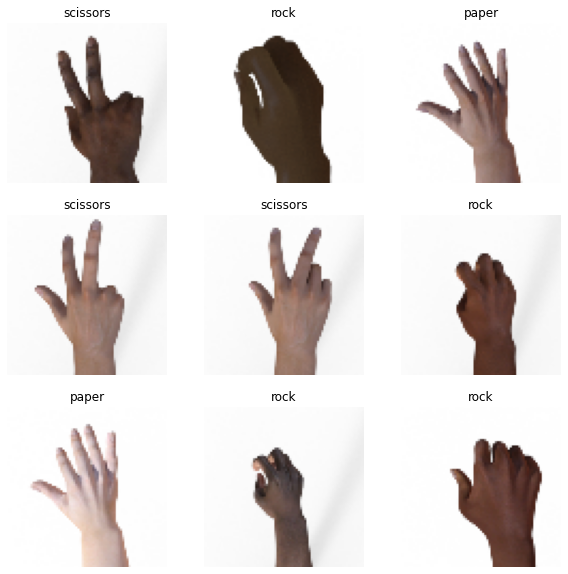

In [26]:
plt.figure(figsize=(10,10))

for images,labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train.class_names[labels[i]])
        plt.axis(False)

# **Creating CNN Model**

In [27]:
scaler = keras.Sequential([keras.layers.experimental.preprocessing.Rescaling(1/255)])

In [28]:
model = keras.Sequential([ scaler,
keras.layers.Conv2D(32,kernel_size=3,strides=2,input_shape=(224, 224, 3),activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(64,kernel_size=3,strides=2,activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.SpatialDropout2D(0.2),
keras.layers.Conv2D(128,kernel_size=3,strides=1,activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.SpatialDropout2D(0.2),
keras.layers.Flatten(),
keras.layers.Dense(50,activation="relu"),
keras.layers.Dropout(0.2),
keras.layers.Dense(3,activation="softmax")

])

In [29]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
history = model.fit(train,validation_data=validation,epochs=10)

Epoch 1/10
63/63 [==============================] - 6s 73ms/step - loss: 1.0588 - accuracy: 0.4306 - val_loss: 0.7919 - val_accuracy: 0.6508
Epoch 2/10
63/63 [==============================] - 5s 72ms/step - loss: 0.4105 - accuracy: 0.8552 - val_loss: 0.0925 - val_accuracy: 0.9841
Epoch 3/10
63/63 [==============================] - 5s 70ms/step - loss: 0.1094 - accuracy: 0.9683 - val_loss: 0.0274 - val_accuracy: 0.9940
Epoch 4/10
63/63 [==============================] - 5s 74ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0188 - val_accuracy: 0.9980
Epoch 5/10
63/63 [==============================] - 5s 70ms/step - loss: 0.0301 - accuracy: 0.9926 - val_loss: 0.0097 - val_accuracy: 0.9940
Epoch 6/10
63/63 [==============================] - 5s 70ms/step - loss: 0.0221 - accuracy: 0.9950 - val_loss: 0.0042 - val_accuracy: 0.9980
Epoch 7/10
63/63 [==============================] - 5s 71ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0067 - val_accuracy: 0.9980
Epoch 8/10
63

# **Visualizing Models Performance**

In [31]:
model.evaluate(test)

12/12 [==============================] - 1s 21ms/step - loss: 0.5088 - accuracy: 0.9167


[0.5088374018669128, 0.9166666865348816]

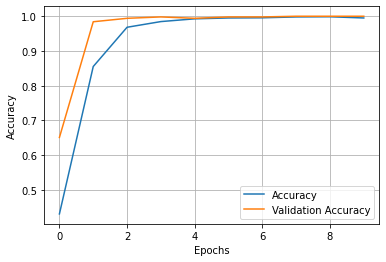

In [32]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

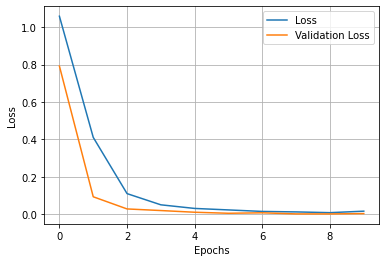

In [33]:
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)